# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec"
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3
   7. DC - DC index from the FWI system: 7.9 to 860.6
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

In [158]:
import pandas as pd

forestfires = pd.read_csv('forestfires.csv')
# Convert month and day to numeric values for when we use the full dataset
forestfires['month'] = [strptime(str(x), '%b').tm_mon for x in forestfires['month']]
forestfires['day'] = [strptime(str(x), '%a').tm_wday for x in forestfires['day']]
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [159]:
forestfires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Question 1.2: Apply log(area+1) to the data

In [160]:
import numpy as np

# Just log the one column, and create a new column for it
# This helps us normalize the data
forestfires['log_area'] = np.log(forestfires['area']+1)
forestfires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.111026
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.398436
min,1.000000,2.000000,1.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710
75%,7.000000,5.000000,9.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


Question 2.1: Visually explore the data using pairplot.

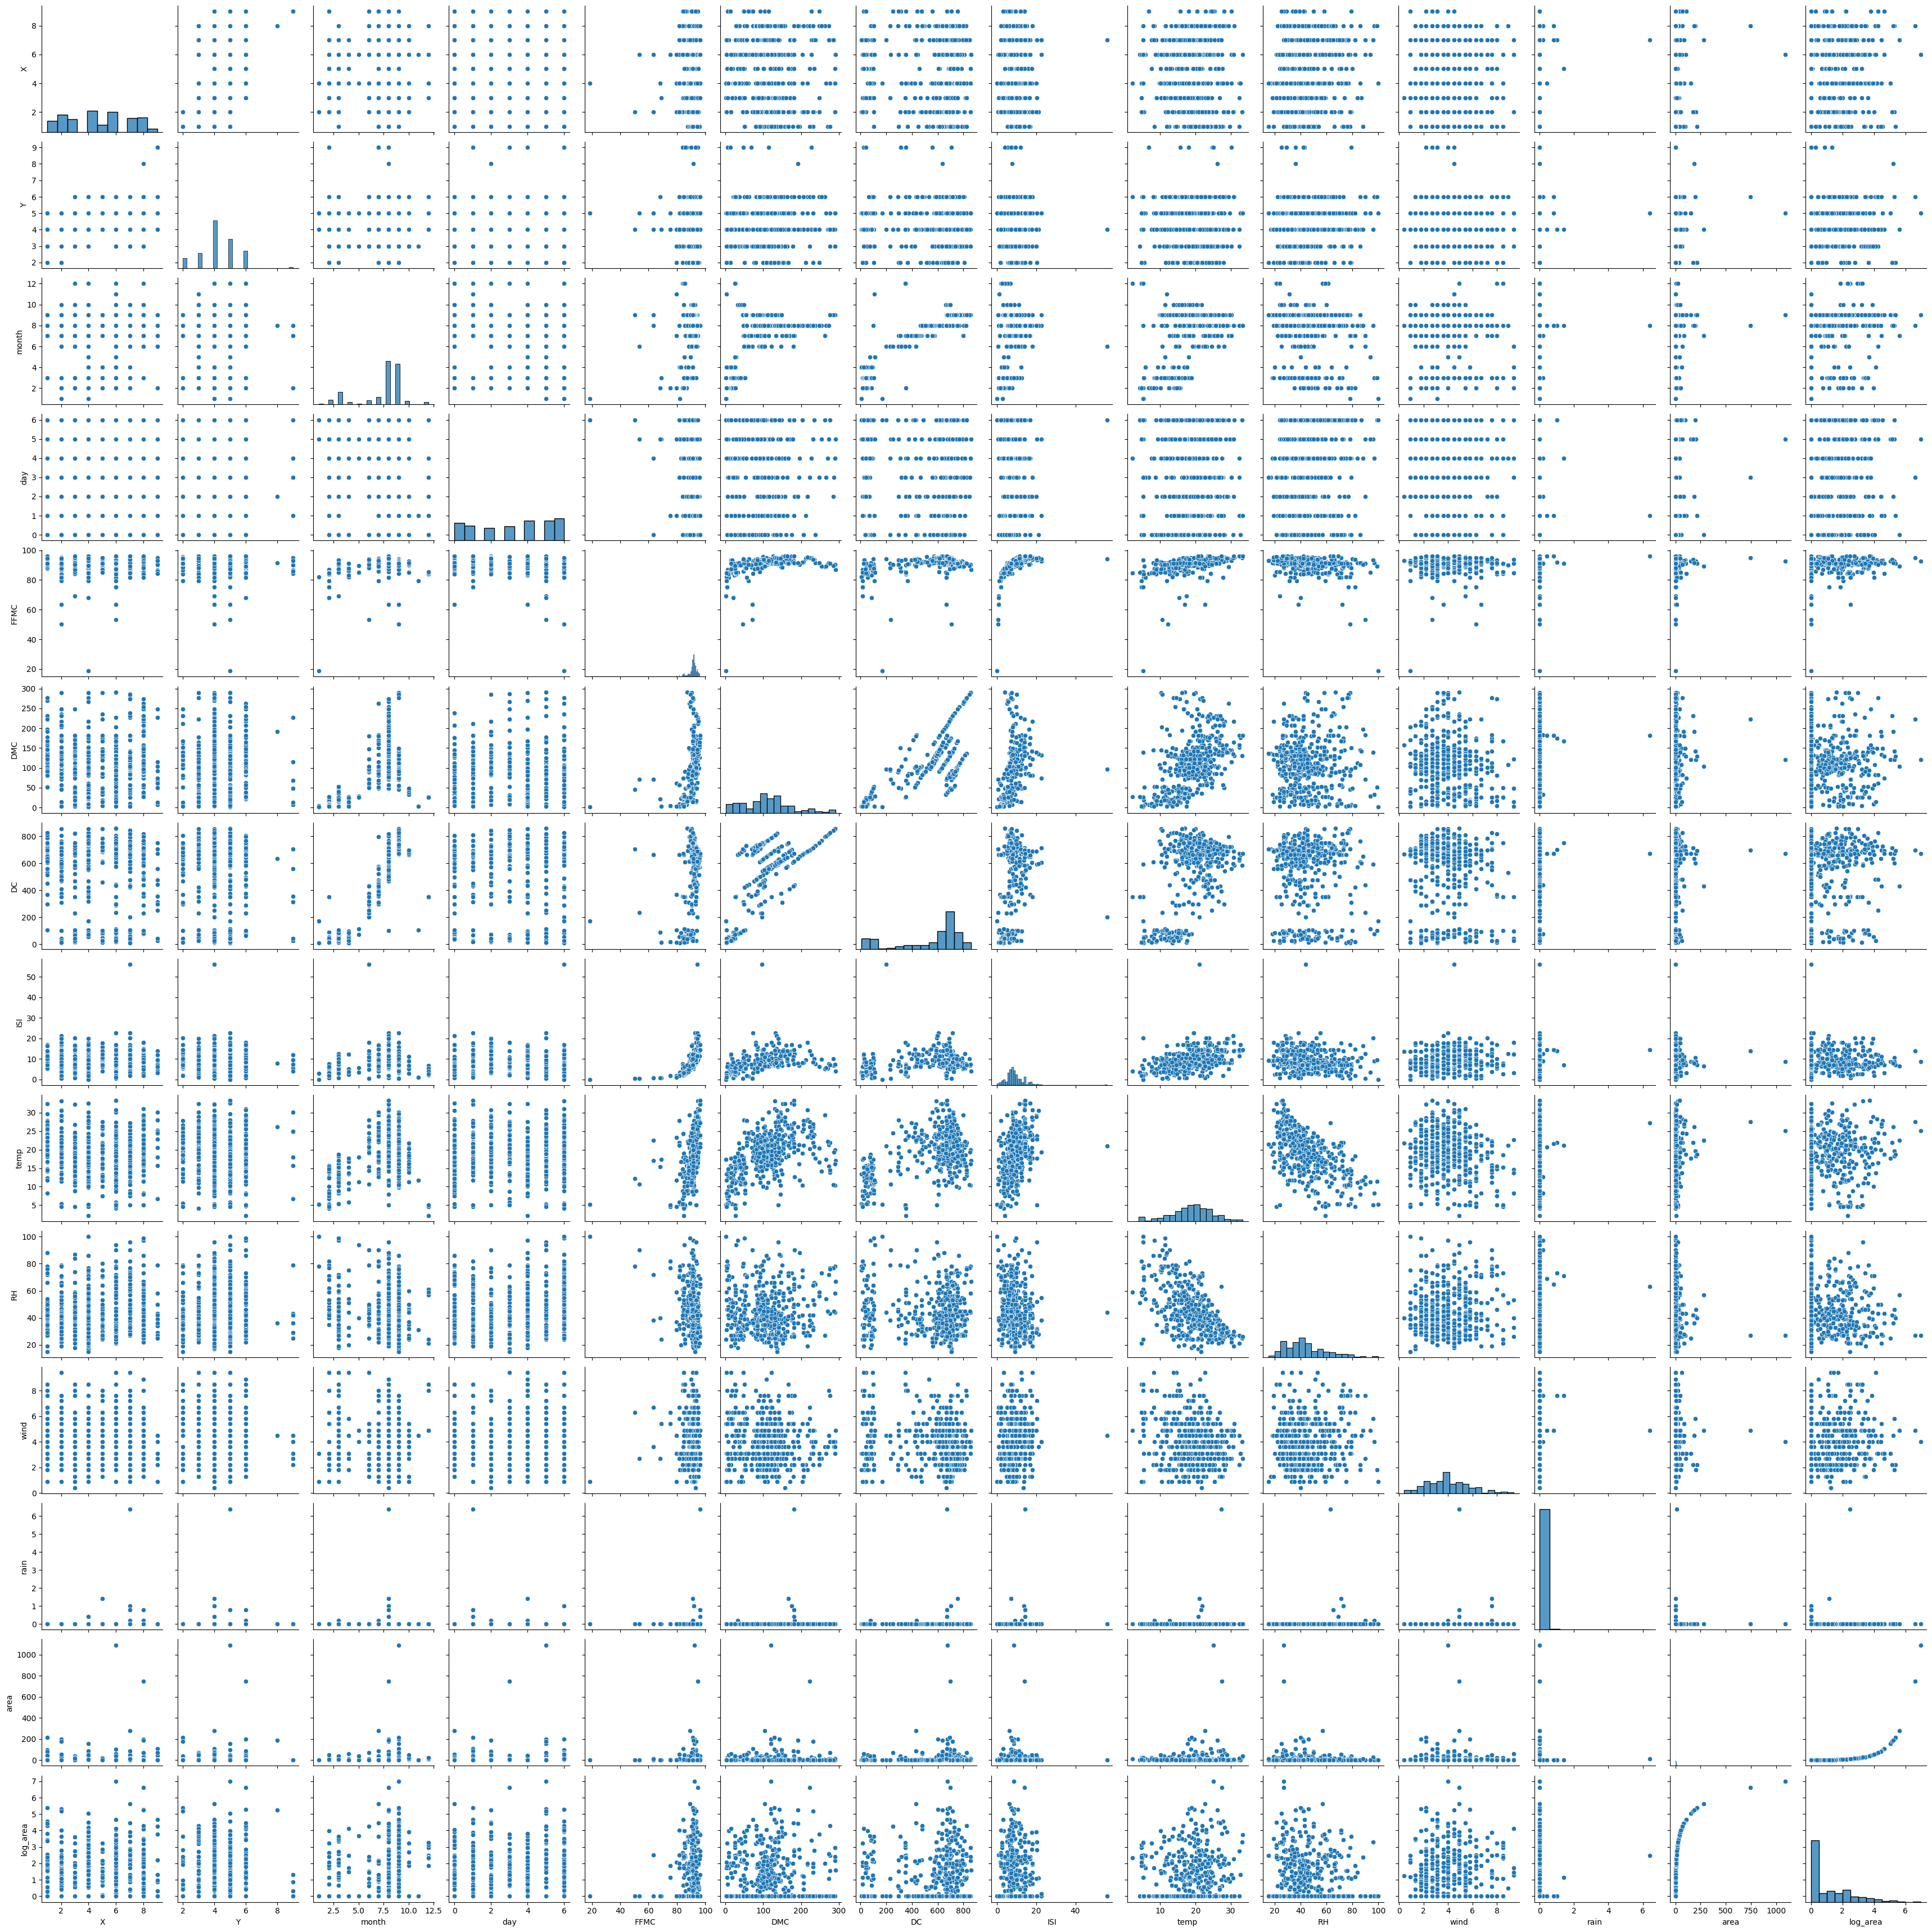

In [161]:
import seaborn as sns

# This takes a LONG time to generate! It should not throw any errors.
sns.pairplot(forestfires)

# Playing with Scatterplots
# First check out the scatterplot of rain + area
#sns.scatterplot(forestfires, x='area', y='rain', hue='temp')
#sns.scatterplot(forestfires, x='log_area', y='rain', hue='temp')
# Rain has an obvious impact on the size of the wildfire.

# Check out the scatterplot of wind + area
#sns.scatterplot(forestfires, x='area', y='wind')
#sns.scatterplot(forestfires, x='log_area', y='wind')

# Check out the scatterplot of wind + area
#sns.scatterplot(forestfires, x='area', y='temp')
#sns.scatterplot(forestfires, x='log_area', y='temp')

#sns.scatterplot(forestfires, x='month', y='wind')
#sns.scatterplot(forestfires, x='month', y='rain')
#sns.scatterplot(forestfires, x='rain', y='wind')

Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

<Axes: xlabel='log_area', ylabel='rain'>

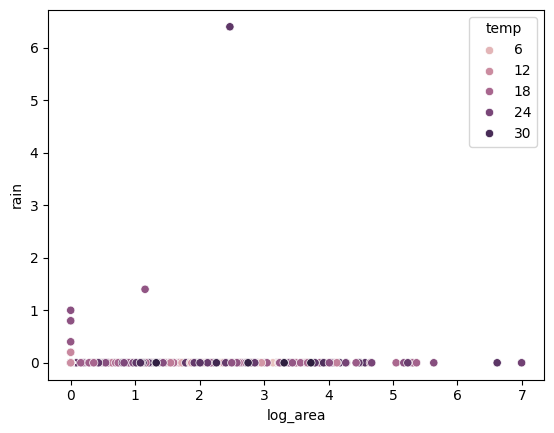

In [162]:
sns.scatterplot(forestfires, x='log_area', y='rain', hue='temp')

There aren't many instances where it rains during the fire, but when it does, it limits the area spread given that we remove the two outlier points where rain is greater than 1mm.

## My Analysis

This is exactly what you would expect. Rain puts out fires!

Looking at the values, we have several outliers, one in particular being the 6mm+ mm of rain day. This day has a high heat (used hue here) and could explain why that is the case. There are also several large fires that are "outliers" in terms of size, but we know that can be caused by factors not accounted for in this model such as fuel type, ground moisture, location, etc.

Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# See the shape of the data first as well as the system types
# print(forestfires.shape, forestfires.info())

X = forestfires[['wind','rain']] # Feature columns
#y = forestfires['area'] # Target to predict (size of the fire)
y = forestfires['log_area'] # Target to predict (size of the fire)
# print('Feature names: ', X)
# print('\nTarget names: ', y, '(Area of Wildfire)')

# These are kind of pointless, they show two linear lines going from the middle to the right for wind, and at the bottom for rain
# sns.regplot(forestfires, x="log_area", y="wind", ci=None, scatter_kws={'s':100, 'facecolor':'red'})
# sns.regplot(forestfires, x="log_area", y="rain", ci=None, scatter_kws={'s':100, 'facecolor':'red'})

# split the dataset into testing and training, I'm using the same breakdown as assignment 1 with 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# build the model
regr = LinearRegression()
regr.fit (X_train, y_train)

y_pred = regr.predict(X_test)
print('Predictions:', y_pred)
print('Coefficients:\n', regr.coef_)
print('Intercept:\n', regr.intercept_)
residuals = y_test - y_pred
print('residuals:\n', residuals)
print('R^2 Accuracy:\n', regr.score(X_test, y_pred)) # Seems very high

#import matplotlib.pyplot as plt
#sns.scatterplot(x = y_test, y = y_pred, s=140)
#plt.xlabel('y_test data')
#plt.ylabel('Predictions')


Predictions: [ 1.10063757  1.23343602  1.10063757  1.12522988  1.16949603  0.99827779
  1.23343602  1.10063757  1.18916987  1.18916987  1.08096372  1.32196833
  1.10063757  1.10063757  1.10063757  1.21376218  1.03669757  1.25802833
  1.08096372  1.41050063  1.32196833  1.14490372  1.12522988  1.14490372
  1.05637142  0.99243142  1.08096372  1.10063757  1.10063757  1.12522988
  1.12522988  1.21376218  1.18916987  1.10063757  1.08096372  1.05637142
  1.03669757  1.34164217  1.16949603  1.21376218  1.21376218  1.03669757
  1.18916987  0.96783912  1.18916987  1.16949603  1.32196833  1.36623448
  1.05637142  1.10063757  1.21376218  1.18916987  1.12522988  1.16949603
  1.03669757  1.05637142  1.21376218  1.21376218  1.01210527  1.27770218
  0.99243142  1.18916987  1.08096372  1.10063757  1.18916987  1.32196833
  1.10063757  1.16949603  1.41050063  1.21376218  1.16949603  1.03669757
  1.12522988  1.41050063  1.14490372 -9.16892724  1.21376218  1.12522988
  1.18916987  1.23343602  0.99243142  

Question 4.2: Calculate the mean squared error of predict results.

In [164]:
print("MSE", mean_squared_error(y_test,y_pred))
# Using 'area' results in a huge error. Use log_area for a much more manageable MSE

MSE 2.7967413664489666


Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [165]:
# Have to convert Month to 1-12 and day to 1-7, do it at the beginning$
from time import strptime

X_all_data = forestfires.iloc[:,:-2] # every column but the last two which are area, log_area
y_log_area = forestfires.iloc[:,-1:] # target last column which is log_area (don't care about area)

X_train_all_data, X_test_all_data, y_train_all_data, y_test_all_data = train_test_split(X_all_data, y_log_area, test_size=0.3, random_state=1)

# build the model
regr_all = LinearRegression()
regr_all.fit(X_train_all_data, y_train_all_data)

y_pred_with_all_data = regr_all.predict(X_test_all_data)
print('Predictions:', y_pred_with_all_data)
print('Coefficients:\n', regr_all.coef_)
print('Intercept:\n', regr_all.intercept_)
residuals_all_data = y_test_all_data - y_pred_with_all_data
print('residuals:\n', residuals_all_data)

Predictions: [[ 0.80372398]
 [ 1.24369192]
 [ 1.03209819]
 [ 1.09918917]
 [ 1.19611016]
 [ 0.91050804]
 [ 1.52434231]
 [ 1.10214422]
 [ 1.27344753]
 [ 1.34424683]
 [ 1.13551333]
 [ 1.11033283]
 [ 0.56083164]
 [ 0.97217804]
 [ 1.32991395]
 [ 0.96937813]
 [ 1.04758974]
 [ 1.20211795]
 [ 1.16994331]
 [ 1.20763714]
 [ 1.5068851 ]
 [ 0.86204641]
 [ 0.97980993]
 [ 1.31325235]
 [ 1.25077797]
 [ 1.07229665]
 [ 1.13004534]
 [ 1.23756809]
 [ 1.24288622]
 [ 1.0412783 ]
 [ 1.06551516]
 [ 1.0228117 ]
 [ 1.24905567]
 [ 1.00051412]
 [ 1.20944054]
 [ 0.91383433]
 [ 0.99741113]
 [ 1.36773683]
 [ 1.00453565]
 [ 1.33995752]
 [ 1.15899642]
 [ 0.66400352]
 [ 1.4287519 ]
 [ 0.8497702 ]
 [ 1.39888095]
 [ 1.02741626]
 [ 1.06180787]
 [ 1.24266659]
 [ 0.82335716]
 [ 0.85080474]
 [ 1.67816212]
 [ 1.51368884]
 [ 1.41726778]
 [ 1.37649964]
 [ 1.3244859 ]
 [ 1.12025173]
 [ 1.2566012 ]
 [ 1.63630794]
 [ 1.24690138]
 [ 1.29208396]
 [ 0.85619658]
 [ 1.00201903]
 [ 1.43698579]
 [ 0.88743907]
 [ 1.42944729]
 [ 1.0811175

Question 5.2: Calculate the mean squared error of predict results.

In [166]:
print("MSE", mean_squared_error(y_test_all_data, y_pred_with_all_data))

MSE 2.7137151271722795


# Analysis

Using all the columns results in a lower MSE. The intercept is different. The R^2 score calculated in Part 1 seemed extraordinarily high meaning the model with wind + rain explains away all the variance. I'm not sure that can be the case, with temperature and month also playing a factor.